In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\ayusi\Downloads\spam.csv", encoding='latin1')

In [3]:
df=df.iloc[:,[0,1]]

In [4]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.shape

(5572, 2)

In [6]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [7]:
df.duplicated().sum()

403

In [8]:
df=df.drop_duplicates(keep='first')

In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace='True')

C:\Users\ayusi\AppData\Local\Temp\ipykernel_9876\2672014157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'v1':'target','v2':'text'},inplace='True')


In [10]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target']) 

C:\Users\ayusi\AppData\Local\Temp\ipykernel_9876\672398725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target']=encoder.fit_transform(df['target'])


In [13]:
df  # 0: is ham and 1: is spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# EDA


In [14]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

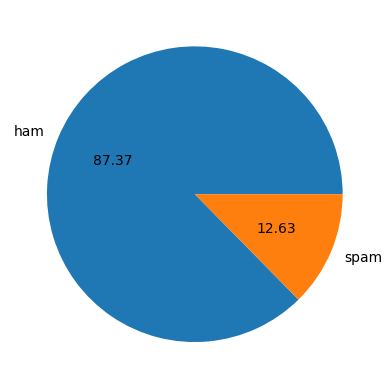

In [15]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [16]:
import nltk

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayusi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['text_char']=df['text'].apply(len)

C:\Users\ayusi\AppData\Local\Temp\ipykernel_9876\4232682879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_char']=df['text'].apply(len)


In [19]:
df

,target,text,text_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [20]:
df['word_len']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\ayusi\AppData\Local\Temp\ipykernel_9876\3169529828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_len']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [21]:
df

,target,text,text_char,word_len
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [22]:
df['sent_len']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\ayusi\AppData\Local\Temp\ipykernel_9876\1851920424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sent_len']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [23]:
df.head()

,target,text,text_char,word_len,sent_len
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: xlabel='text_char', ylabel='Count'>

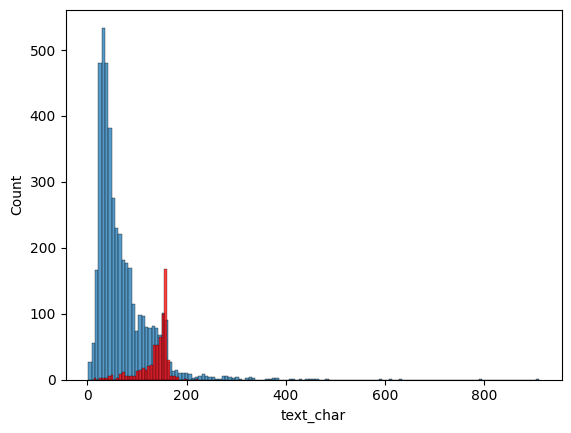

In [24]:
sns.histplot(df[df['target']==0]['text_char'])
sns.histplot(df[df['target']==1]['text_char'],color='red')

<Axes: xlabel='word_len', ylabel='Count'>

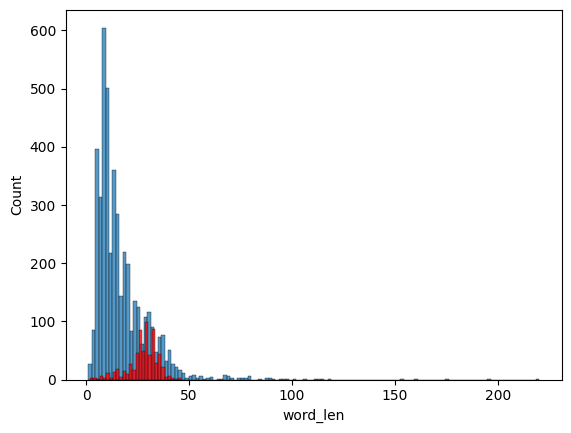

In [25]:
sns.histplot(df[df['target']==0]['word_len'])
sns.histplot(df[df['target']==1]['word_len'],color='red')

In [26]:
df[['target','text_char','word_len','sent_len']].corr() 

,target,text_char,word_len,sent_len
target,1.000000,0.384717,0.262912,0.263939
text_char,0.384717,1.000000,0.965760,0.624139
word_len,0.262912,0.965760,1.000000,0.679971
sent_len,0.263939,0.624139,0.679971,1.000000


# Data Preprocessing


In [27]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
stopwords.words('english')
string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayusi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [29]:
def transform_text(text) :
    
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text :
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [30]:
df['text'][11]

'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info'

In [31]:
  transform_text(df['text'][11])

'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info'

In [32]:
df['transformed_text']=df['text'].apply(transform_text)

C:\Users\ayusi\AppData\Local\Temp\ipykernel_9876\4139466366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [33]:
df

,target,text,text_char,word_len,sent_len,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [34]:
from wordcloud import WordCloud
wc=WordCloud(width=600,height=600,min_font_size=10,background_color='white')

In [35]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

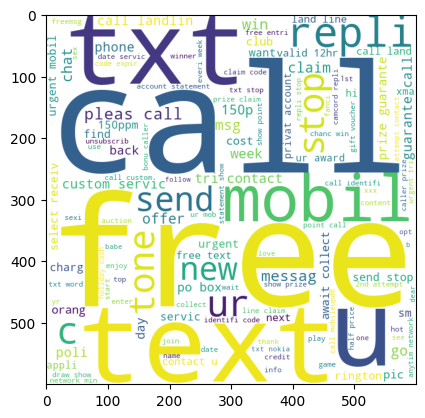

In [36]:
plt.imshow(spam_wc)

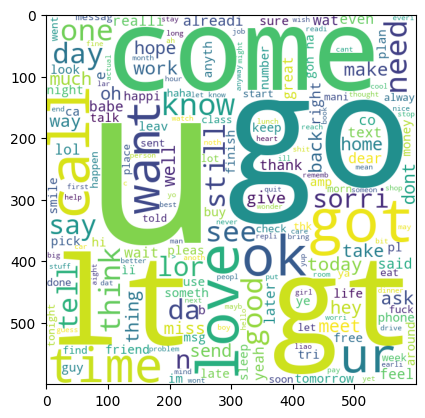

In [37]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(ham_wc)

# Model Building

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [39]:
x1=cv.fit_transform(df['transformed_text']).toarray()
x2=tfidf.fit_transform(df['transformed_text']).toarray()

In [40]:
print(x1.shape)
print(x2.shape)

(5169, 6708)
(5169, 3000)


In [41]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [42]:
from sklearn.model_selection import train_test_split
x1_train , x1_test, y1_train, y1_test=train_test_split(x1,y,test_size=0.2,random_state=42)
x2_train , x2_test, y2_train, y2_test=train_test_split(x2,y,test_size=0.2,random_state=42)

In [43]:
print(x1_train.shape)
print(x2_train.shape)

(4135, 6708)
(4135, 3000)


In [44]:
print(x1_test.shape)
print(x2_test.shape)

(1034, 6708)
(1034, 3000)


In [45]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
GNB=GaussianNB()
MNB=MultinomialNB()
BNB=BernoulliNB()

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [47]:
GNB.fit(x1_train,y1_train)
y1_pred1=GNB.predict(x1_test)
print(accuracy_score(y1_test,y1_pred1))
print(confusion_matrix(y1_test,y1_pred1))
print(precision_score(y1_test,y1_pred1))

0.8684719535783365
[[772 117]
 [ 19 126]]
0.5185185185185185


In [48]:
MNB.fit(x1_train,y1_train)
y1_pred2=MNB.predict(x1_test)
print(accuracy_score(y1_test,y1_pred2))
print(confusion_matrix(y1_test,y1_pred2))
print(precision_score(y1_test,y1_pred2))


0.9738878143133463
[[872  17]
 [ 10 135]]
0.8881578947368421


In [49]:
BNB.fit(x1_train,y1_train)
y1_pred3=BNB.predict(x1_test)
print(accuracy_score(y1_test,y1_pred3))
print(confusion_matrix(y1_test,y1_pred3))
print(precision_score(y1_test,y1_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


In [50]:
GNB.fit(x2_train,y2_train)
y2_pred1=GNB.predict(x2_test)
print(accuracy_score(y2_test,y2_pred1))
print(confusion_matrix(y2_test,y2_pred1))
print(precision_score(y2_test,y2_pred1))


0.8607350096711799
[[769 120]
 [ 24 121]]
0.5020746887966805


In [51]:
MNB.fit(x2_train,y2_train)
y2_pred2=MNB.predict(x2_test)
print(accuracy_score(y2_test,y2_pred2))
print(confusion_matrix(y2_test,y2_pred2))
print(precision_score(y2_test,y2_pred2))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [52]:
BNB.fit(x2_train,y2_train)
y2_pred3=BNB.predict(x2_test)
print(accuracy_score(y2_test,y2_pred3))
print(confusion_matrix(y2_test,y2_pred3))
print(precision_score(y2_test,y2_pred3))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


# Finding Performances of Different Algorithms


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [54]:
svc= SVC(kernel='sigmoid',gamma=1.0)
knc= KNeighborsClassifier()
lr = LogisticRegression(solver='liblinear',penalty='l1')
mnb= MultinomialNB()
dtc= DecisionTreeClassifier( max_depth=5)
rfc= RandomForestClassifier(n_estimators=50,random_state=4)
adc= AdaBoostClassifier(n_estimators=50,random_state=4)
bc = BaggingClassifier(n_estimators=50,random_state=4)
etc= ExtraTreesClassifier(n_estimators=50,random_state=4)
gbc= GradientBoostingClassifier(n_estimators=50,random_state=4)
xgb= XGBClassifier(n_estimators=50,random_state=4)




In [55]:
clfs={
    'SVC':svc,
    'KNN':knc,
    'NB' :mnb,
    'LR' :lr,
    'DT':dtc,
    'RF': rfc,
    'AdaBoost': adc,
    'BgC': bc,
    'ETC': etc,
    'GBC':gbc,
    'XGB':xgb
}

In [63]:
def train_classifier(clf,x2_train,x2_test,y2_train,y2_test):
    clf.fit(x2_train,y2_train)
    y_pred=clf.predict(x2_test)
    accuracy= accuracy_score(y2_test,y_pred)
    precision= precision_score(y2_test,y_pred)
    
    return accuracy,precision
    

In [65]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision= train_classifier(clf,x2_train,x2_test,y2_train,y2_test)
    print('For',name)
    print('Accuracy-',current_accuracy)
    print('Precision-',current_precision )
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SVC
Accuracy- 0.97678916827853
Precision- 0.9548872180451128
For KNN
Accuracy- 0.9042553191489362
Precision- 1.0
For NB
Accuracy- 0.9729206963249516
Precision- 0.9915966386554622
For LR
Accuracy- 0.9468085106382979
Precision- 0.8688524590163934
For DT
Accuracy- 0.9332688588007737
Precision- 0.8275862068965517
For RF
Accuracy- 0.9748549323017408
Precision- 0.983739837398374
For AdaBoost
Accuracy- 0.9506769825918762
Precision- 0.8671875
For BgC
Accuracy- 0.9613152804642167
Precision- 0.8776978417266187
For ETC
Accuracy- 0.97678916827853
Precision- 0.984
For GBC
Accuracy- 0.9458413926499033
Precision- 0.968421052631579
For XGB
Accuracy- 0.9680851063829787
Precision- 0.9375


In [66]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [73]:
performance_df=performance_df.sort_values(by='Precision',ascending=False)

In [74]:
 performance_df

,Algorithm,Accuracy,Precision
1,KNN,0.904255,1.000000
2,NB,0.972921,0.991597
8,ETC,0.976789,0.984000
5,RF,0.974855,0.983740
9,GBC,0.945841,0.968421
0,SVC,0.976789,0.954887
10,XGB,0.968085,0.937500
7,BgC,0.961315,0.877698
3,LR,0.946809,0.868852
6,AdaBoost,0.950677,0.867188


KNN has a Precision of 1 but has an Accuracy of 90. MultiNomialNB has second highest Precision and also has an accuracy of 97. All others have accuracy less than 99 so we will discard all of them. In KNN and MultiNomialNB we will give priority to Accuracy and thus we will choose MultiNomialNB as our Final_Model.